In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy import stats as st
import statsmodels.api as sm

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# cd gdrive
# cd MyDrive
# cd Colab-Notebooks

In [3]:
m = pd.read_csv("measurements.csv")

In [4]:
m.columns

Index(['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

In [5]:
def varray(x):
  return x.to_numpy().reshape((-1,1))
def onesvarray(x):
  return np.column_stack((np.ones(len(x)), x.to_numpy().reshape((-1,1))))
def onesmatrix(x):
  return np.column_stack((np.ones(x.shape[0]), x.to_numpy()))
def OLSdirect(y, X):
  res = sm.OLS(y, X).fit()
  pred_ols = res.get_prediction()
  return res

In [6]:
X = onesmatrix(m[['weight_init', 'height_init']])
y = varray(m.BMI_init)

res = sm.OLS(y, X).fit()
pred_ols = res.get_prediction()
print(res.summary())
print("Parameters: ", res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3432.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           5.45e-76
Time:                        19:24:13   Log-Likelihood:                -18.257
No. Observations:                  80   AIC:                             42.51
Df Residuals:                      77   BIC:                             49.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3793      0.709     76.665      0.0

In [7]:
res.get_robustcov_results(cov_type='HC1', use_t=None).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1422.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.62e-61
Time:                        19:24:13   Log-Likelihood:                -18.257
No. Observations:                  80   AIC:                             42.51
Df Residuals:                      77   BIC:                             49.66
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3793      0.907     59.968      0.000      52.574      56.185
x1             0.4093      0.008     51.782      0.000       0.394       0.425
x2            -0.3483      0.008    -45.430      0.000      -0.364      -0.333
==============================================================================
Omnibus:                        5.131   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.346
Skew:                          -0.488   Prob(JB):                        0.114
Kurtosis:                       3.593   Cond. No.                     3.47e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

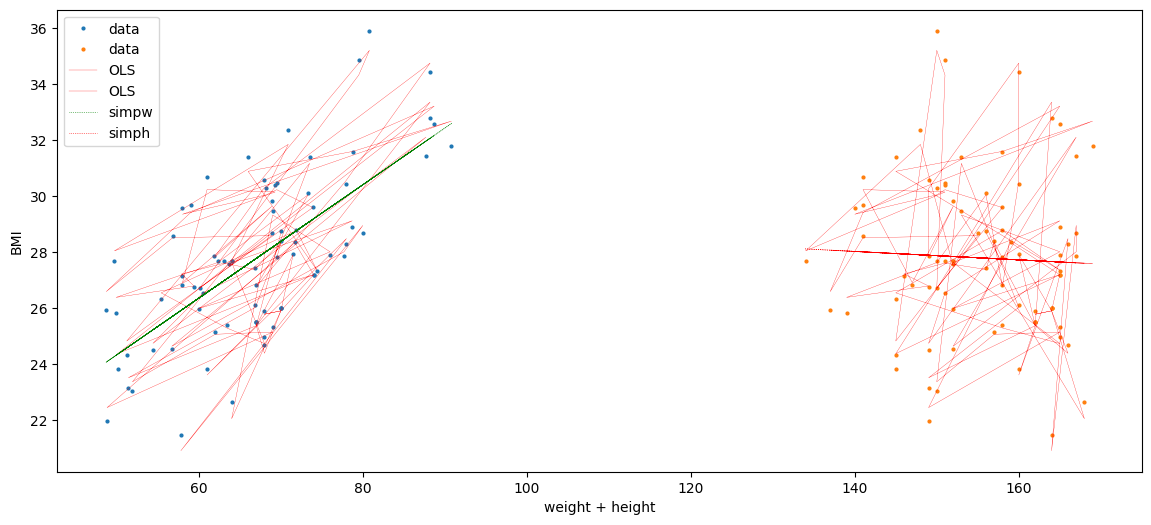

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(X[:,1:], y, "o", label="data", markersize=2, linewidth = 0.3)
ax.plot(X[:,1:], res.fittedvalues, "r-", label="OLS", markersize=0.1, linewidth = 0.2)
ax.plot(X[:,1], X[:,[0,1]] @ (np.linalg.pinv(X[:,[0,1]]) @ y), "g:", label="simpw", markersize=2, linewidth = 0.5)
ax.plot(X[:,2], X[:,[0,2]] @ (np.linalg.pinv(X[:,[0,2]]) @ y), "r:", label="simph", markersize=2, linewidth = 0.5)
#ax.plot(X[:,1:], iv_u, "r--", linewidth = 0.1)
#ax.plot(X[:,1:], iv_l, "r--", linewidth = 0.1)
ax.set_xlabel('weight + height')
ax.set_ylabel('BMI')
ax.legend(loc="best")
plt.show()

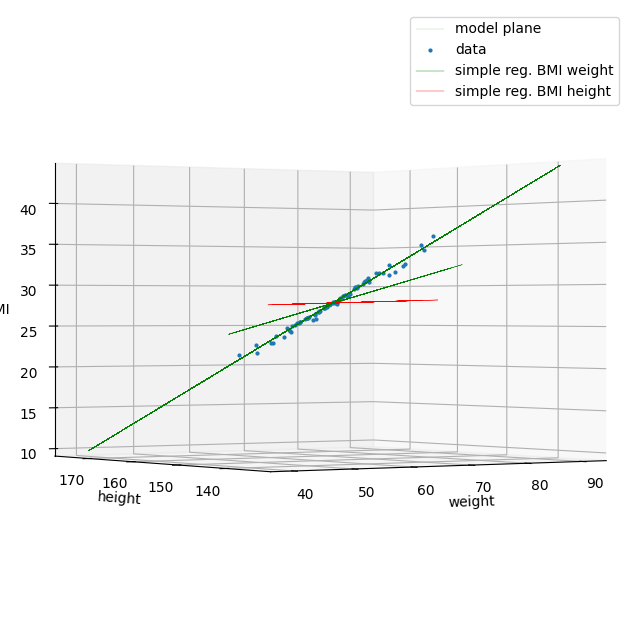

In [16]:
ax = plt.figure(figsize=(14, 8)).add_subplot(projection='3d')
ax.view_init(0, 235.5)     # 0, 235.5

mx, my = np.meshgrid(np.linspace(40, 90, 80), np.linspace(135,175,80))
mz = res.params[0] + res.params[1]*mx + res.params[2]*my
ax.plot_wireframe(mx, my, mz, color='green', linewidth=0.1, ccount=10, rcount=10, antialiased=False, label='model plane')

ax.plot(X[:,1], X[:,2], y.reshape((-1)), 'o', markersize = 2, linewidth = 0.3, label = 'data')
#ax.plot(X[:,1], X[:,2], res.fittedvalues.reshape((-1)), 'g-', markersize=2, linewidth = 0.3, label = 'model curve')

ax.plot(X[:,1], np.ones(80)*155, (X[:,[0,1]] @ (np.linalg.pinv(X[:,[0,1]]) @ y)).reshape((-1)), 'g-', markersize=3, linewidth = 0.3, label='simple reg. BMI weight')
ax.plot(np.ones(80)*67, X[:,2], (X[:,[0,2]] @ (np.linalg.pinv(X[:,[0,2]]) @ y)).reshape((-1)), 'r-', markersize=3, linewidth = 0.3, label='simple reg. BMI height')

ax.set_xlabel('weight')
ax.set_ylabel('height')
ax.set_zlabel('BMI')
ax.legend()
plt.show()

In [10]:
OLSdirect(y, X[:,[0,1]]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     68.38
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.83e-12
Time:                        19:24:14   Log-Likelihood:                -173.13
No. Observations:                  80   AIC:                             350.3
Df Residuals:                      78   BIC:                             355.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2317      1.659      8.580      0.000      10.930      17.534
x1             0.2023      0.024      8.269      0.000       0.154       0.251
==============================================================================
Omnibus:                        1.666   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                1.697
Skew:                           0.306   Prob(JB):                        0.428
Kurtosis:                       2.632   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
OLSdirect((m.BMI_init / m.weight_init).values.reshape((-1,1)), X[:,[0,1]]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     72.79
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           8.75e-13
Time:                        19:24:14   Log-Likelihood:                 158.12
No. Observations:                  80   AIC:                            -312.2
Df Residuals:                      78   BIC:                            -307.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6419      0.026     24.322      0.000       0.589       0.694
x1            -0.0033      0.000     -8.532      0.000      -0.004      -0.003
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.857
Skew:                           0.206   Prob(JB):                        0.652
Kurtosis:                       2.704   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
OLSdirect((m.BMI_init * m.weight_init).values.reshape((-1,1)), X[:,[0,1]]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     599.2
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.37e-38
Time:                        19:24:14   Log-Likelihood:                -513.49
No. Observations:                  80   AIC:                             1031.
Df Residuals:                      78   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -944.3463    116.802     -8.085      0.000   -1176.882    -711.811
x1            42.1652      1.723     24.478      0.000      38.736      45.595
==============================================================================
Omnibus:                        2.214   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.971
Skew:                           0.383   Prob(JB):                        0.373
Kurtosis:                       2.942   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
OLSdirect((m.BMI_init * m.height_init**2).values.reshape((-1,1)), X[:,[0,1]]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.745e+20
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:24:14   Log-Likelihood:                 657.53
No. Observations:                  80   AIC:                            -1311.
Df Residuals:                      78   BIC:                            -1306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.704e-05   5.13e-05      0.722      0.473   -6.51e-05       0.000
x1         10000.0000   7.57e-07   1.32e+10      0.000   10000.000       1e+04
==============================================================================
Omnibus:                        2.168   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.451
Skew:                          -0.028   Prob(JB):                        0.484
Kurtosis:                       2.343   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
OLSdirect(m.BMI_init.diff()[1:].values.reshape((-1,1)), X[1:,[0,1]]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     52.47
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.86e-10
Time:                        19:24:14   Log-Likelihood:                -194.84
No. Observations:                  79   AIC:                             393.7
Df Residuals:                      77   BIC:                             398.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.0760      2.245     -7.162      0.000     -20.545     -11.607
x1             0.2399      0.033      7.244      0.000       0.174       0.306
==============================================================================
Omnibus:                        1.591   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.972
Skew:                           0.204   Prob(JB):                        0.615
Kurtosis:                       3.360   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
OLSdirect(m.BMI_init.diff().diff()[2:].values.reshape((-1,1)), X[2:,[0,1]]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     15.42
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           0.000188
Time:                        19:24:14   Log-Likelihood:                -248.17
No. Observations:                  78   AIC:                             500.3
Df Residuals:                      76   BIC:                             505.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.8004      4.591     -3.877      0.000     -26.945      -8.656
x1             0.2661      0.068      3.926      0.000       0.131       0.401
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.869
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.396
Skew:                          -0.326   Prob(JB):                        0.498
Kurtosis:                       2.932   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""